In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='latin1')

C:\Users\Sharavani\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terror.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [6]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Renamed a few columns for ease
terror.rename(columns={'eventid':'event','iyear':'Year', 'imonth':'month', 'iday':'day',
                      'country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType',
                      'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                      'targtype1_txt':'Target_type','weaptype1_txt':'weapon_type','motive':'Motive'},inplace=True)

In [8]:
terror.head()

,event,Year,month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
trr = terror[['Year','month','day','Country','State','Region','city','latitude','longitude','AttackType','Killed',
             'Wounded','Target','Summary','Group','Target_type','weapon_type','Motive']]

In [10]:
trr.head()

,Year,month,day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
trr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [12]:
trr.isnull().sum()

Year                0
month               0
day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
weapon_type         0
Motive         131130
dtype: int64

In [13]:
# Filled up values in trr where day=0 and month=9 with some random values
trr['day'] = trr['day'].apply(lambda x:np.random.randint(1,32) if x==0 else x)
trr['month'] = trr['month'].apply(lambda x:np.random.randint(1,19) if x==9 else x)

C:\Users\Sharavani\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Sharavani\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Filled up null values
trr['State'].fillna(value='NA',inplace=True)
trr['Summary'].fillna(value='NA',inplace=True)
trr['city'].fillna(value='NA',inplace=True)
trr['Target'].fillna(value='NA',inplace=True)
trr['latitude'].fillna(value=trr['latitude'].mean(),inplace=True)
trr['longitude'].fillna(value=trr['longitude'].mean(),inplace=True)
trr['Killed'].fillna(value=trr['Killed'].mean(),inplace=True)
trr['Wounded'].fillna(value=trr['Wounded'].mean(),inplace=True)

C:\Users\Sharavani\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


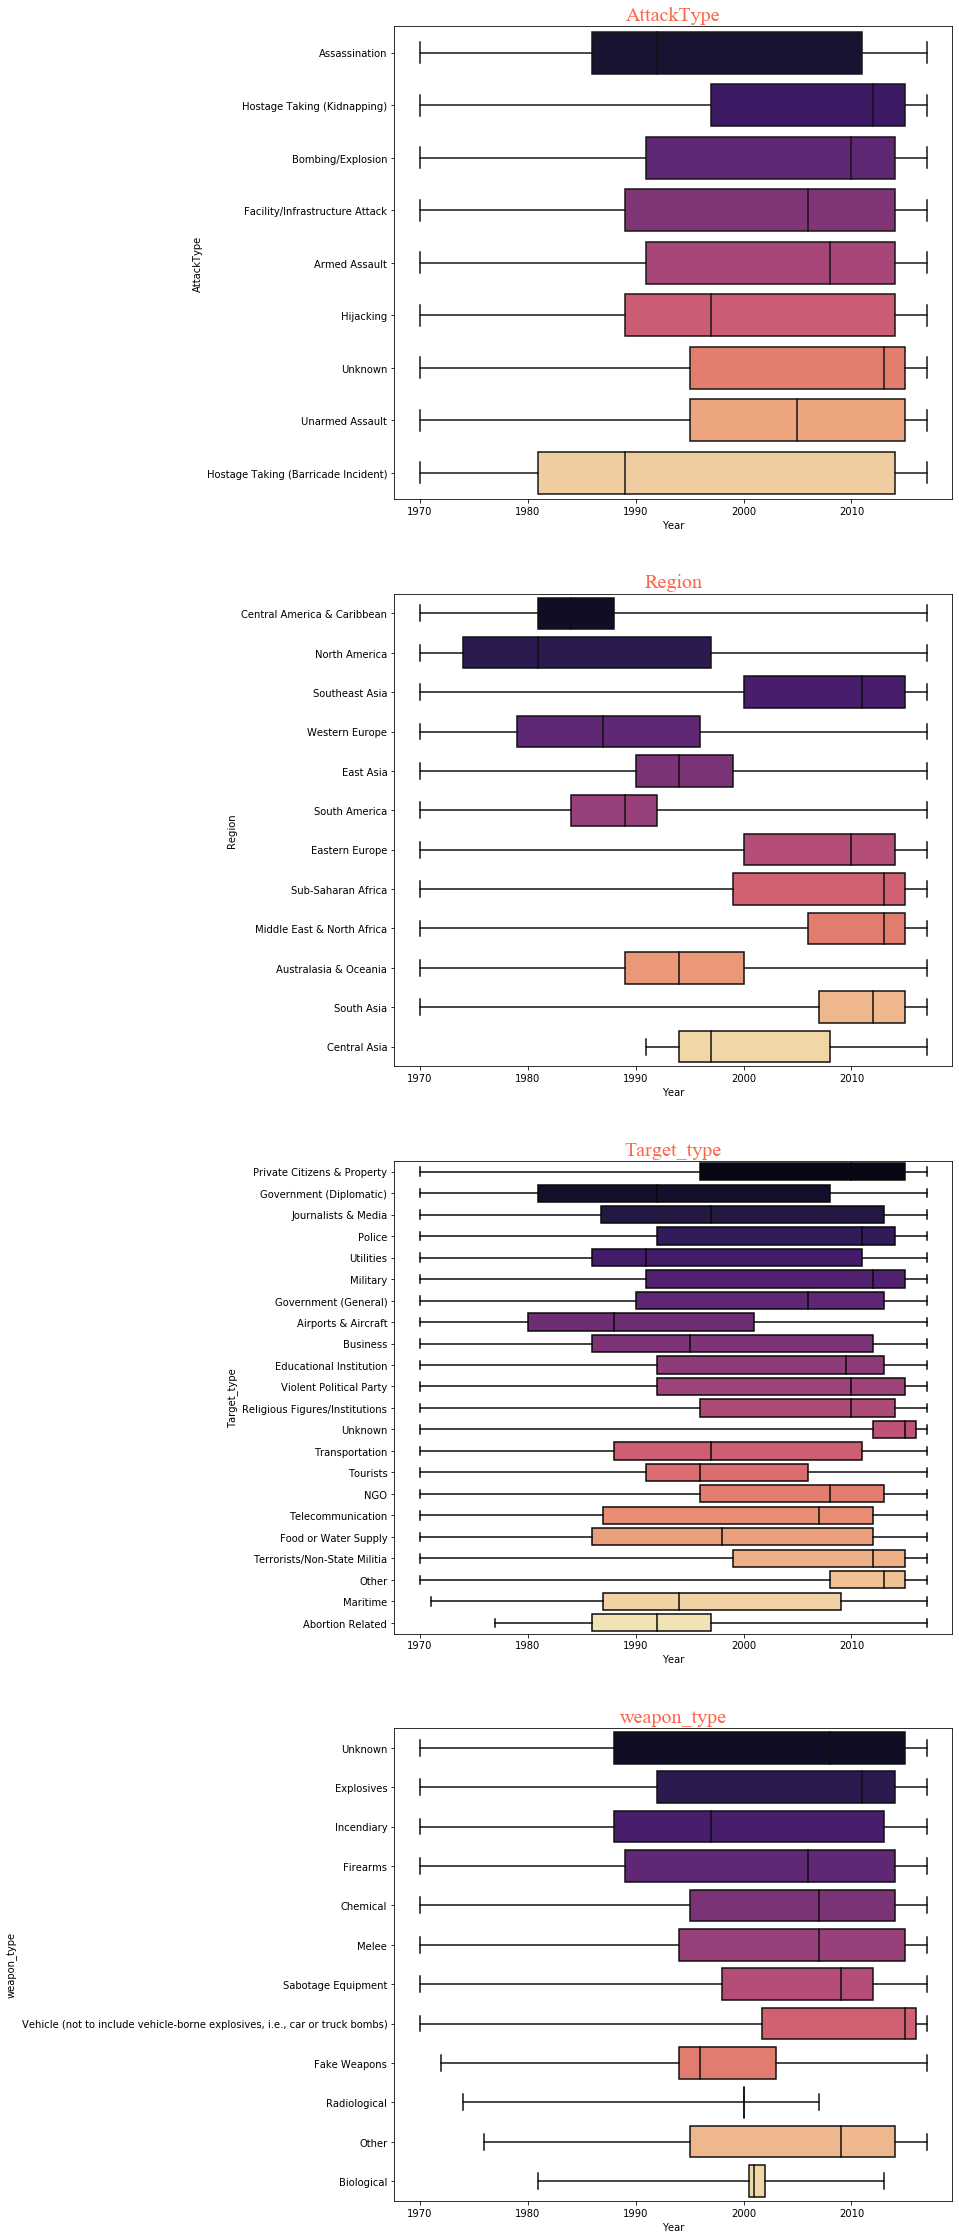

In [15]:
d = {'AttackType':1,'Region':2,'Target_type':3,'weapon_type':4}
title_style = {'family':'Times New Roman','color':'Tomato','size':20}
plt.figure(figsize=(10,40))

for value,i in d.items():
    plt.subplot(4,1,i)
    sns.boxplot(x='Year',y = value, data=trr, whis=[0,100], palette='magma')
    plt.title(value, fontdict= title_style)

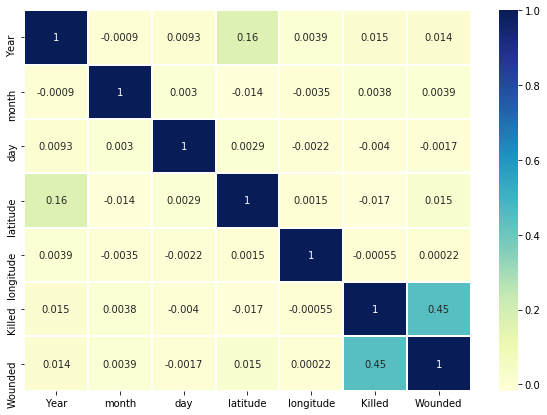

In [16]:
# Found out correlation of all the columns
plt.figure(figsize=(10,7))
sns.heatmap(trr.corr(), annot=True, xticklabels='auto', yticklabels='auto', linewidths=1, cmap='YlGnBu')

Text(0.5, 1.0, 'Number of terrorist activities each year')

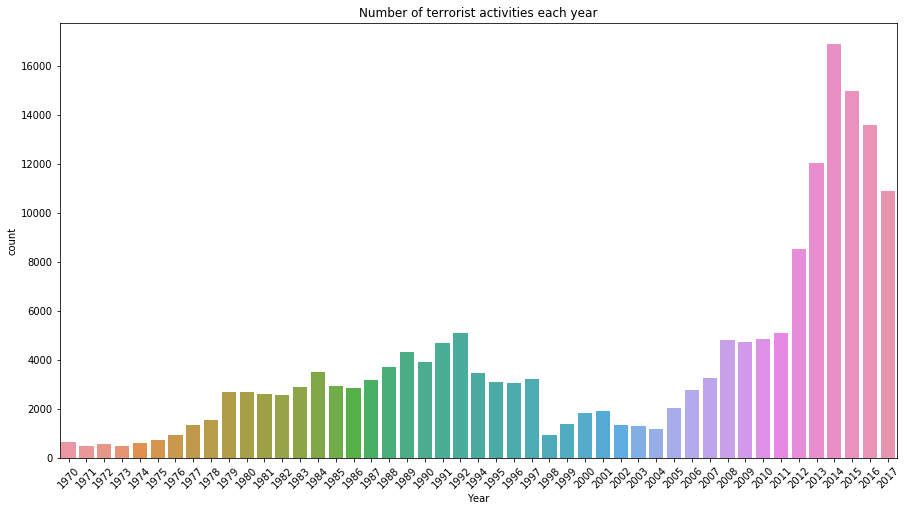

In [17]:
plt.figure(figsize=(15,8))
sns.countplot('Year',data=trr)
plt.xticks(rotation=45)
plt.title('Number of terrorist activities each year')

Text(0, 0.5, 'Number of attacks')

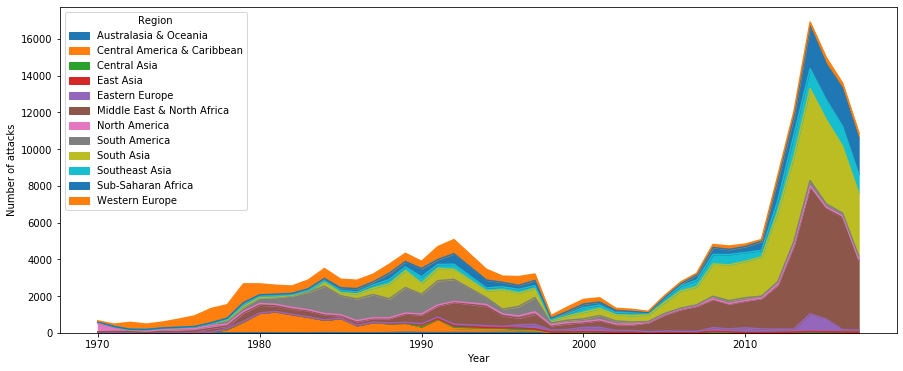

In [18]:
pd.crosstab(trr.Year, trr.Region).plot(kind='area',figsize=(15,6))
plt.ylabel('Number of attacks')

Text(0.5, 1.0, 'Top countries affected')

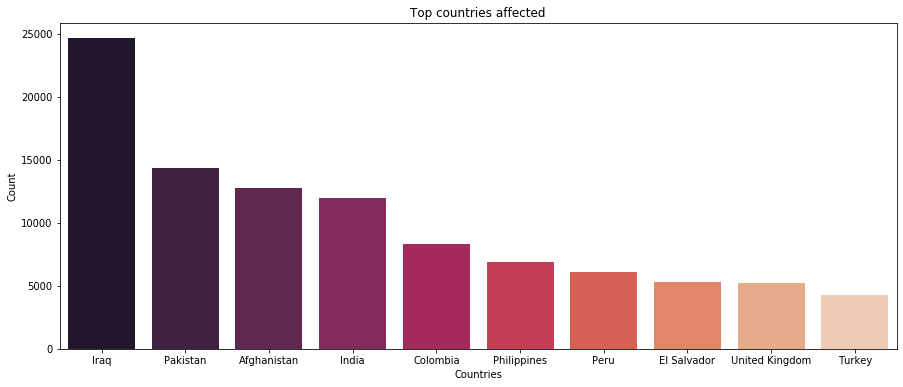

In [19]:
plt.figure(figsize=(15,6))
sns.barplot(x=trr['Country'].value_counts()[:10].index, y=trr['Country'].value_counts()[:10],data=trr ,palette='rocket')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top countries affected')

In [20]:
weapons = pd.crosstab(trr.weapon_type, trr.Region)

In [21]:
weapons

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
weapon_type,,,,,,,,,,,,
Biological,0,0,0,2,0,1,24,1,2,0,3,2
Chemical,11,2,2,17,12,73,26,26,83,11,12,46
Explosives,80,3149,254,333,3089,32283,1557,9098,22568,5039,6319,8657
Fake Weapons,0,0,1,4,4,6,5,3,3,0,1,6
Firearms,74,5679,232,41,1461,11877,682,6525,15169,5634,7499,3651
Incendiary,74,435,15,252,186,1181,897,1077,2285,837,840,3056
Melee,10,65,14,82,90,1227,74,131,998,147,478,339
Other,1,0,0,3,4,23,18,6,16,4,19,20
Radiological,0,0,0,10,0,0,1,0,1,0,0,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

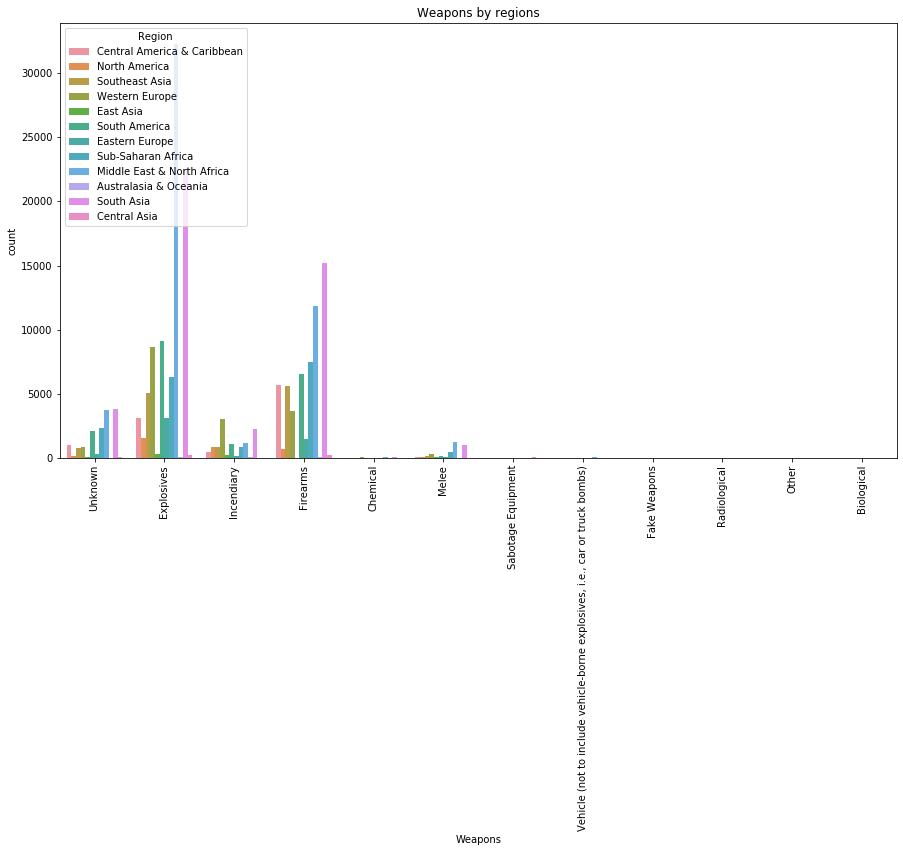

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'weapon_type', hue='Region', data=trr)
plt.xlabel('Weapons')
plt.ylabel('count')
plt.title('Weapons by regions')
plt.xticks(rotation=90)